# California Housing Price Prediction Using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#### Reading Data

In [2]:
notebook_path = os.path.abspath("HousingLinearRegression.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\housing.csv")
df = pd.read_csv(path)

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Data Cleaning

In [4]:
df = df.drop_duplicates()
df.duplicated().values.any()

False

In [5]:
df = df.fillna(method="ffill")
pd.isnull(df).any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.642151,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.876678,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
df.shape

(20640, 10)

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

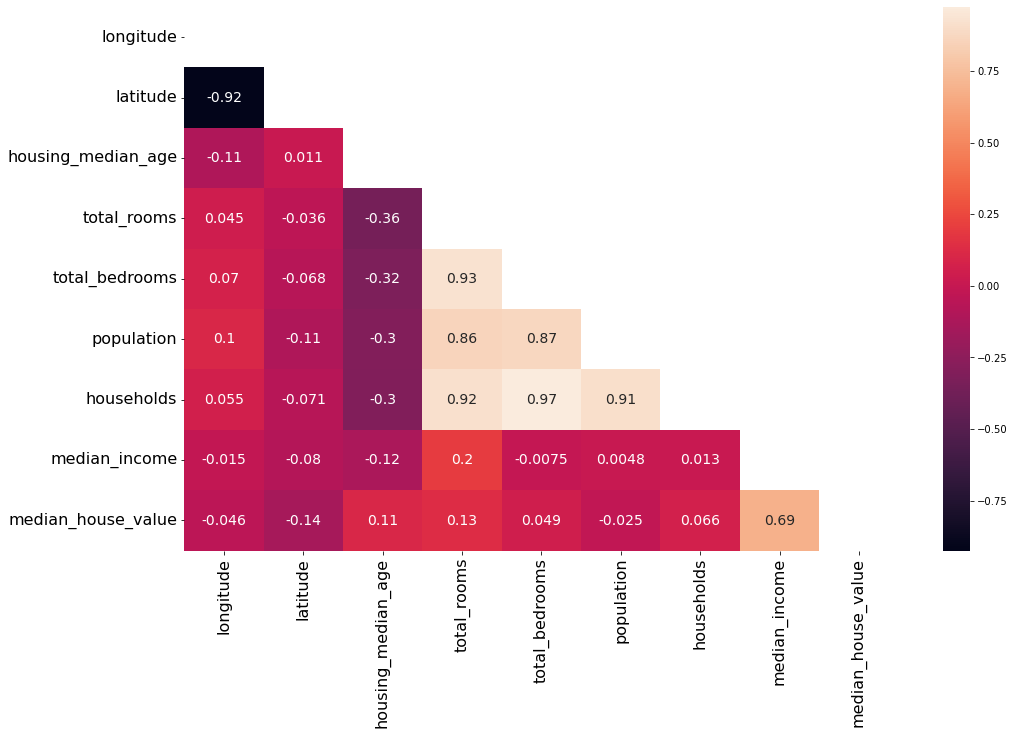

In [10]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Adding Relevant Features

In [11]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


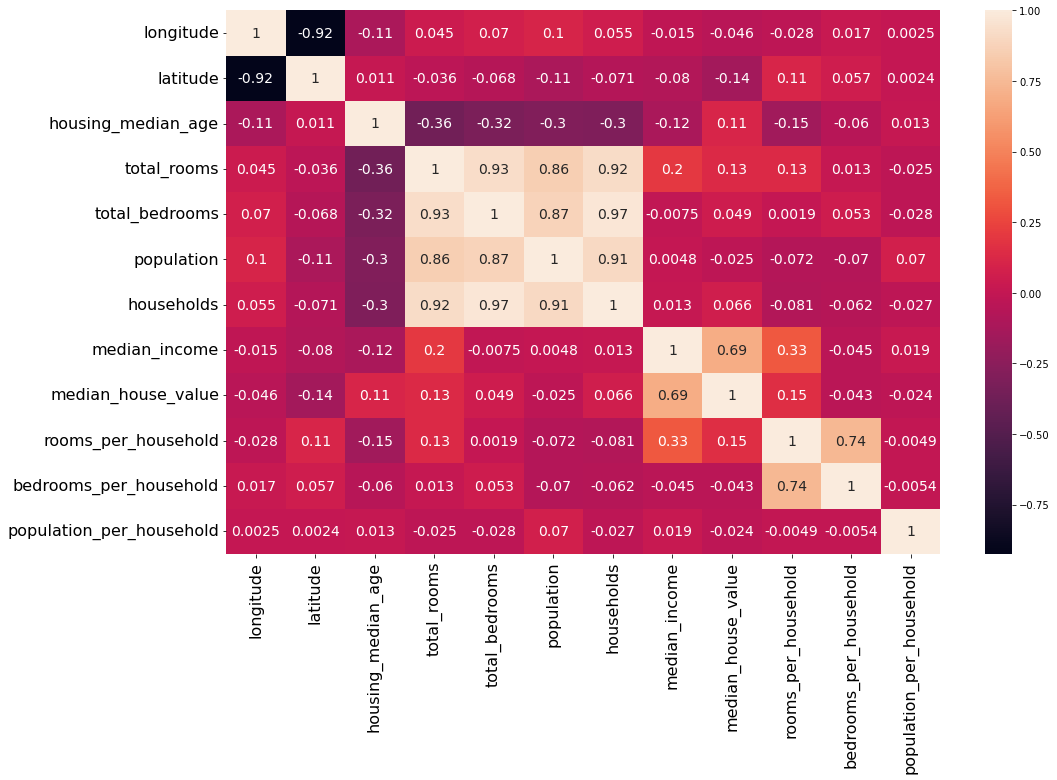

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB


In [15]:
df.shape

(20640, 13)

In [16]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'population_per_household'],
      dtype='object')

In [17]:
freq = df.ocean_proximity.value_counts()
print(freq)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


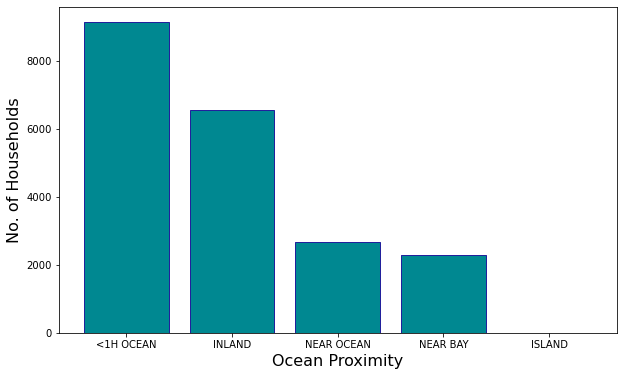

In [18]:
freq = df.ocean_proximity.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(freq.index, height = freq,ec='#21209c',color='#008891')
plt.xlabel('Ocean Proximity', fontsize=16)
plt.ylabel('No. of Households', fontsize=16)
plt.show()

#### Data Visualization

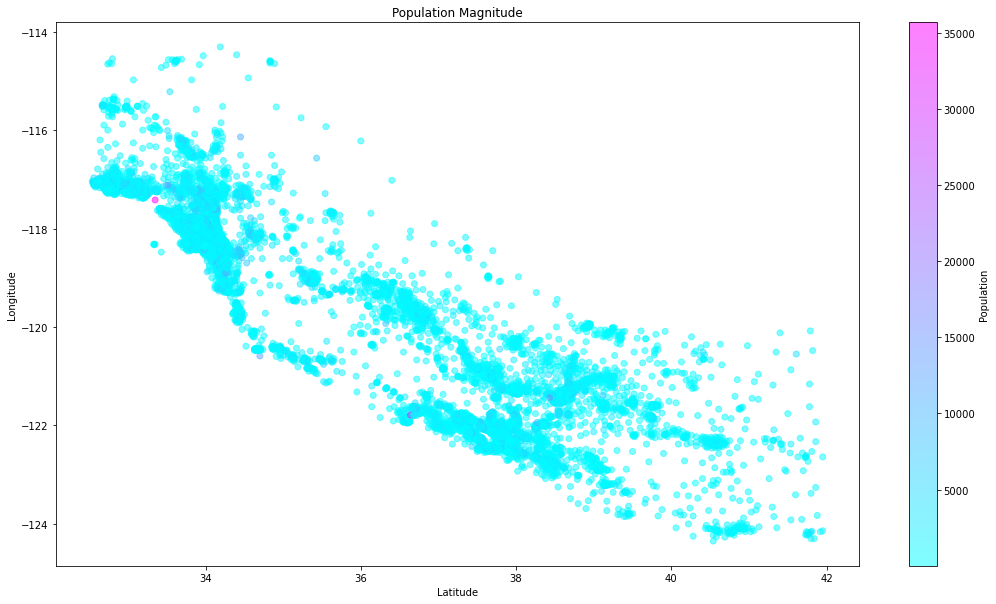

In [19]:
plt.figure(figsize=(18,10))
plt.scatter(df['latitude'],df['longitude'],c=df['population'], cmap='cool', alpha = 0.5)
plt.colorbar().set_label("Population")
plt.title('Population Magnitude')
plt.xlabel('Latitude')

plt.ylabel('Longitude')
plt.show()

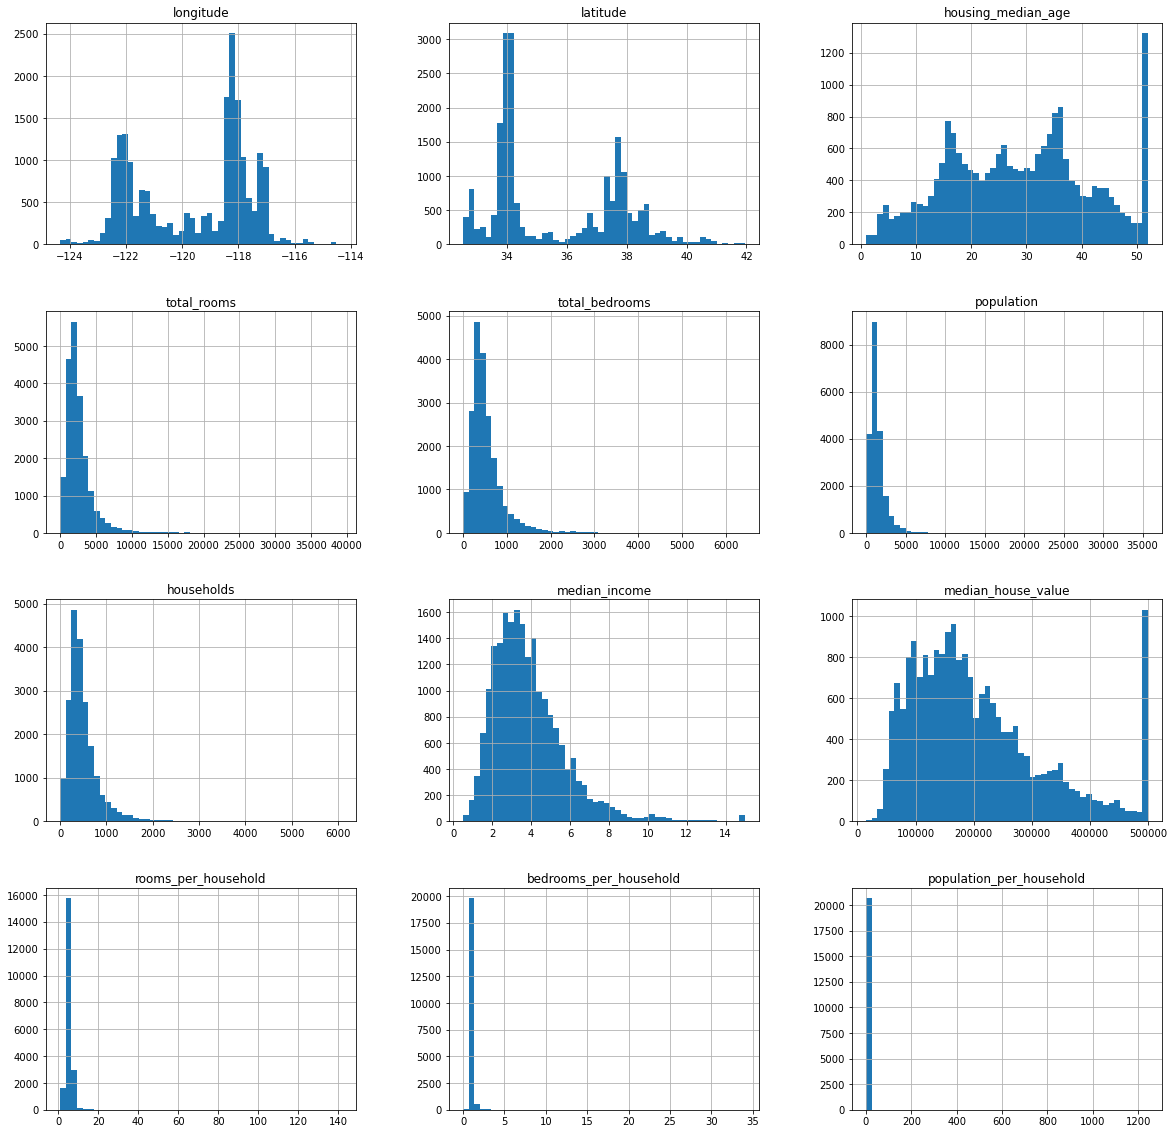

In [20]:
df.hist(bins=50, figsize=(20,20))
plt.show()

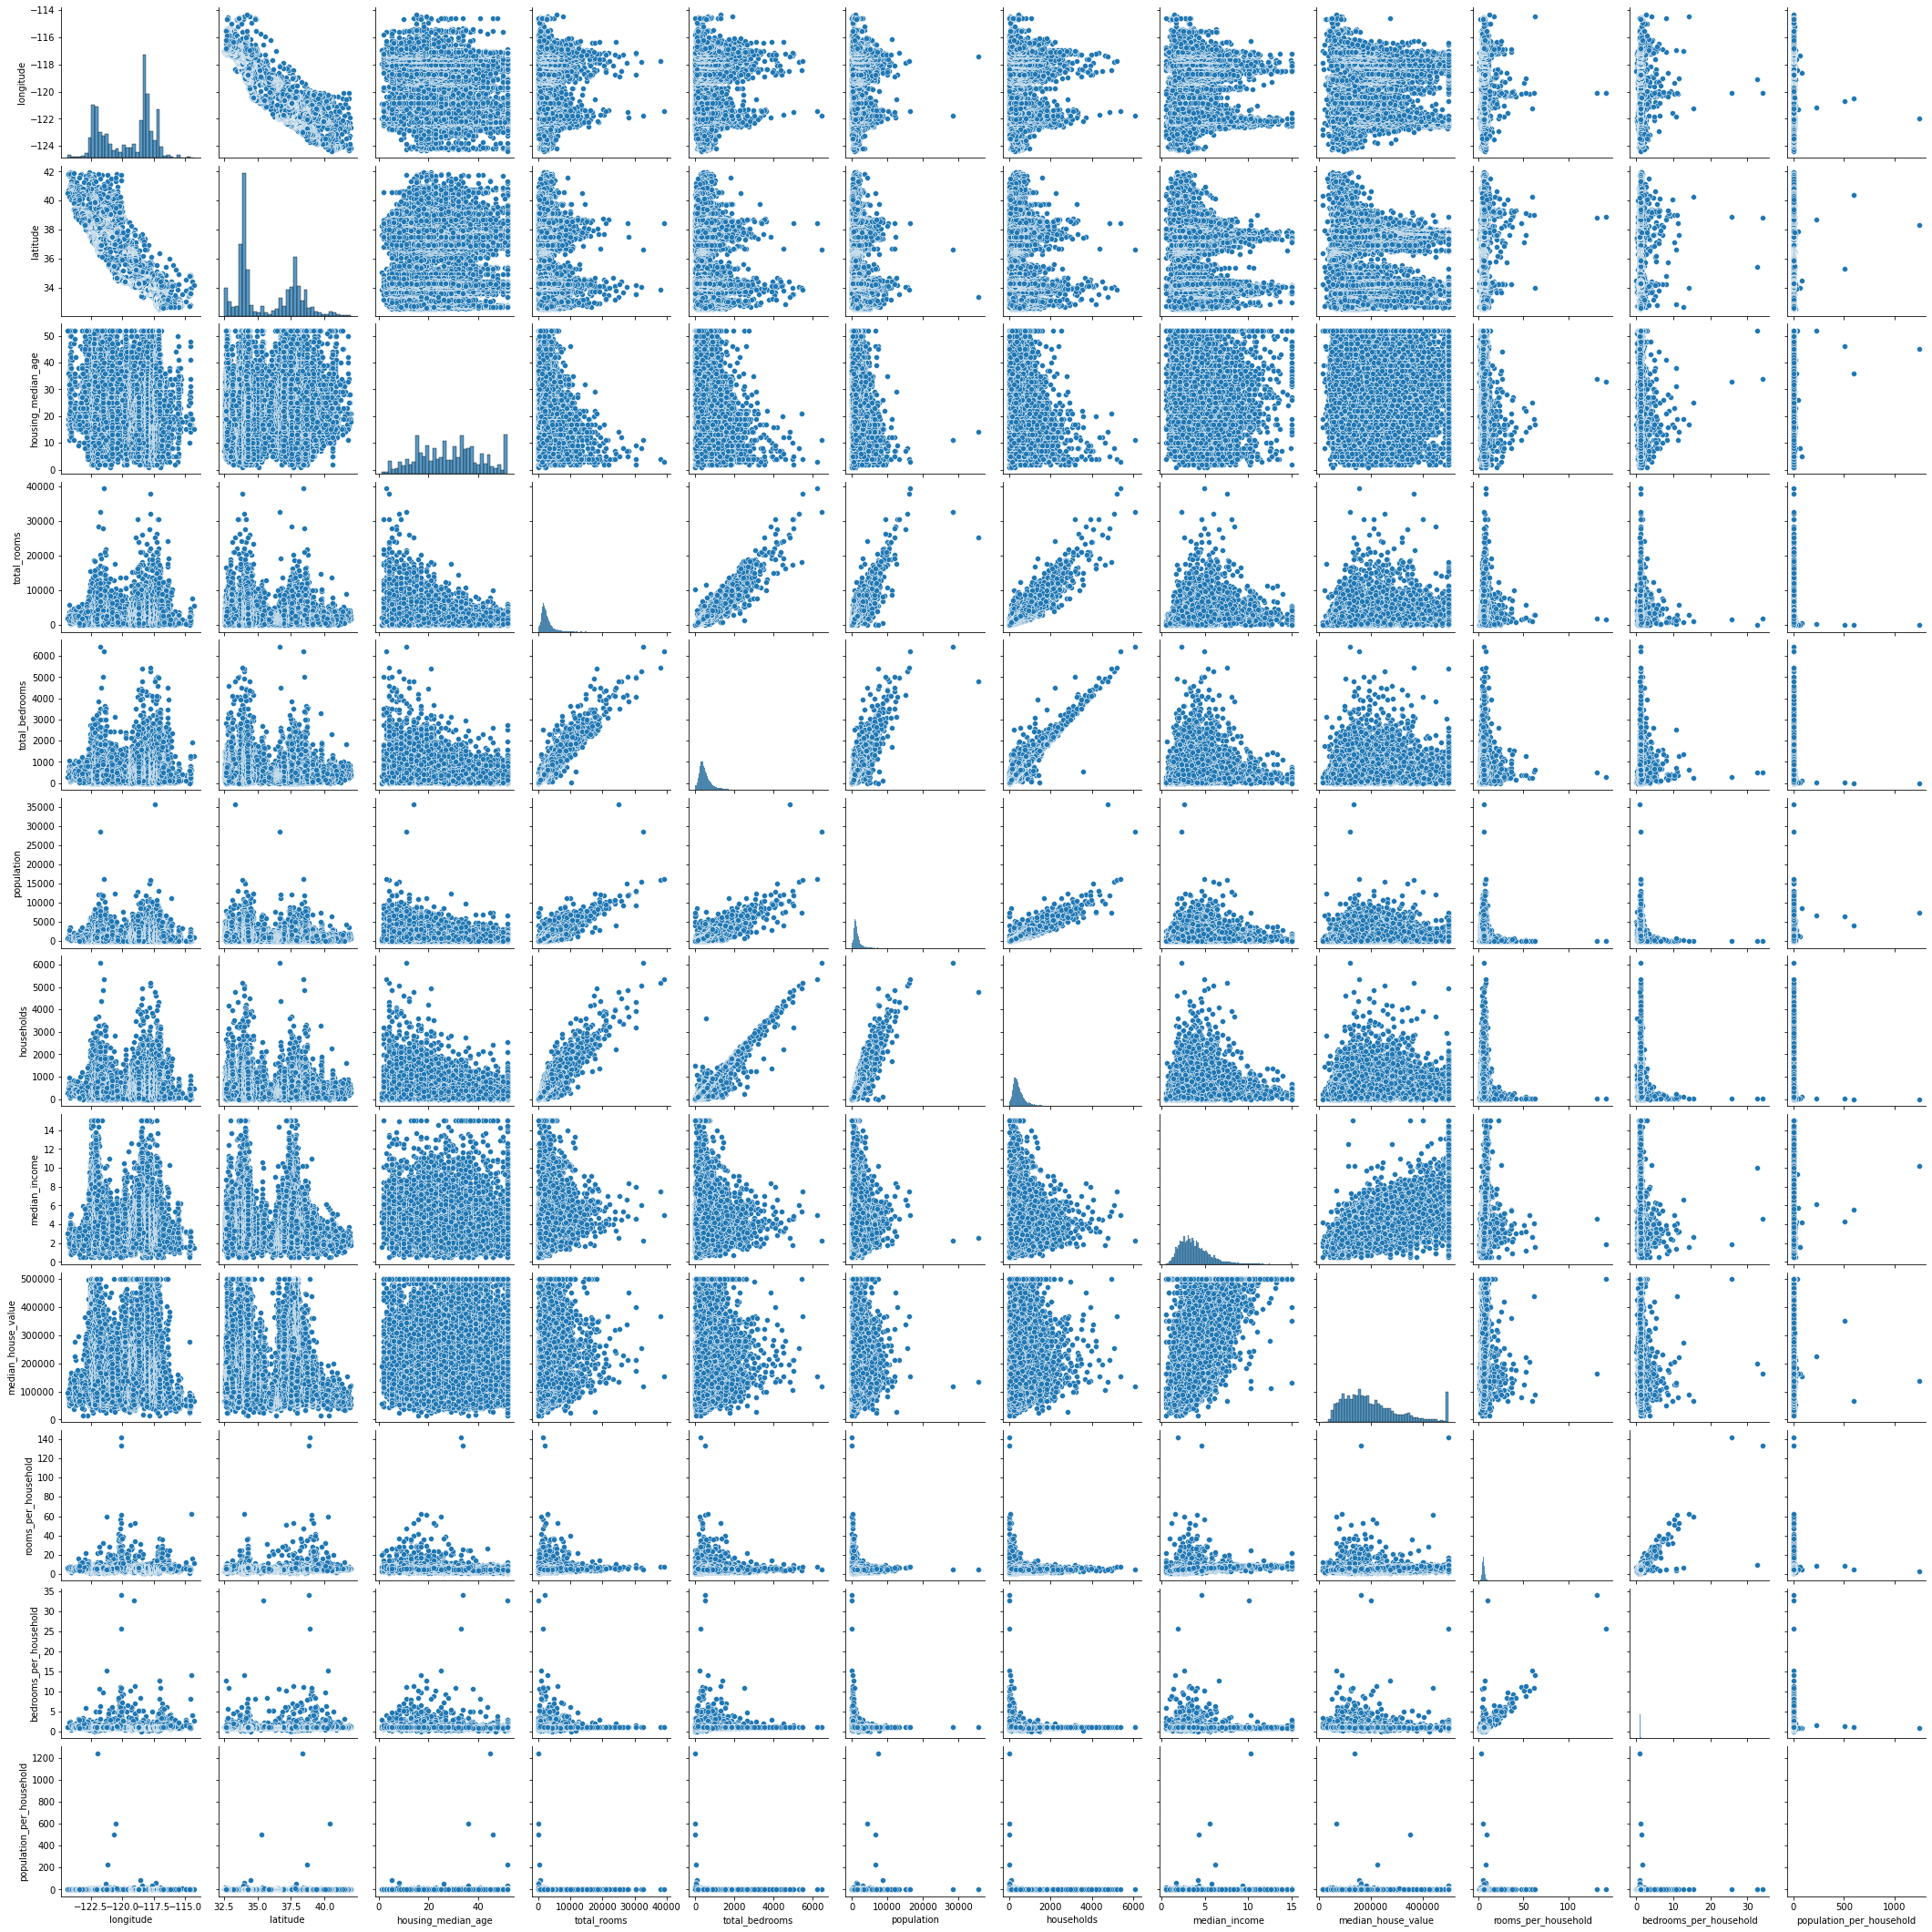

In [21]:
sns.pairplot(df)
plt.show()

#### Normalization

In [22]:
without_ocean_proximity_df = df.drop(['ocean_proximity', 'median_house_value'],axis=1)
without_ocean_proximity_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,1.133333,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,1.315789,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,1.120092,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,1.171920,2.123209


In [23]:
normalized_df=(without_ocean_proximity_df-without_ocean_proximity_df.min())/(without_ocean_proximity_df.max()-without_ocean_proximity_df.min())
normalized_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.043512,0.029823,0.001499
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.038224,0.028298,0.001141
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.052756,0.031280,0.001698
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.035241,0.031269,0.001493
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.038534,0.031504,0.001198
...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.029769,0.033038,0.001503
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.037344,0.038396,0.001956
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.030904,0.032650,0.001314
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.031783,0.034171,0.001152


In [24]:
normalized_df['ocean_proximity'] = df['ocean_proximity']
normalized_df['median_house_value'] = df['median_house_value']
normalized_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.043512,0.029823,0.001499,NEAR BAY,452600.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.038224,0.028298,0.001141,NEAR BAY,358500.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.052756,0.031280,0.001698,NEAR BAY,352100.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.035241,0.031269,0.001493,NEAR BAY,341300.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.038534,0.031504,0.001198,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.029769,0.033038,0.001503,INLAND,78100.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.037344,0.038396,0.001956,INLAND,77100.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.030904,0.032650,0.001314,INLAND,92300.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.031783,0.034171,0.001152,INLAND,84700.0


#### Data Transformation

In [25]:
normalized_df['NEAR BAY']=0
normalized_df['INLAND']=0
normalized_df['<1H OCEAN']=0
normalized_df['ISLAND']=0
normalized_df['NEAR OCEAN']=0

In [26]:
normalized_df.loc[normalized_df['ocean_proximity']=='NEAR BAY','NEAR BAY']=1
normalized_df.loc[normalized_df['ocean_proximity']=='INLAND','INLAND']=1
normalized_df.loc[normalized_df['ocean_proximity']=='<1H OCEAN','<1H OCEAN']=1
normalized_df.loc[normalized_df['ocean_proximity']=='ISLAND','ISLAND']=1
normalized_df.loc[normalized_df['ocean_proximity']=='NEAR OCEAN','NEAR OCEAN']=1

In [27]:
normalized_df = normalized_df.drop(['ocean_proximity'],axis=1)
normalized_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household,median_house_value,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.043512,0.029823,0.001499,452600.0,1,0,0,0,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.038224,0.028298,0.001141,358500.0,1,0,0,0,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.052756,0.031280,0.001698,352100.0,1,0,0,0,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.035241,0.031269,0.001493,341300.0,1,0,0,0,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.038534,0.031504,0.001198,342200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.029769,0.033038,0.001503,78100.0,0,1,0,0,0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.037344,0.038396,0.001956,77100.0,0,1,0,0,0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.030904,0.032650,0.001314,92300.0,0,1,0,0,0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.031783,0.034171,0.001152,84700.0,0,1,0,0,0


#### Model Training

In [28]:
x = normalized_df.drop(['total_rooms','total_bedrooms','population','households','median_house_value'],axis=1)
y = normalized_df['median_house_value']

In [29]:
x.shape

(20640, 12)

In [30]:
y.shape

(20640,)

In [31]:
trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2)

In [32]:
lrmodel = LinearRegression()
scores = cross_val_score(estimator=lrmodel, X=trainX, y=trainY, cv=10)
print("score :",scores.mean())

score : 0.6041471749504198


In [33]:
lrmodel.fit(trainX, trainY)

LinearRegression()

In [34]:
modelPredict = lrmodel.predict(testX)
modelPredict

array([144988.59997782, 264956.98639673, 316300.60730309, ...,
       288893.26619346, 265984.90693775, 234982.9479156 ])

In [35]:
meanSqError = mean_squared_error(testY, modelPredict)
meanSqError

5331812361.208765

In [36]:
rootMSE = np.sqrt(meanSqError)
rootMSE

73019.26020721358

In [37]:
print("coef:",lrmodel.coef_)
print("intercept:",lrmodel.intercept_)

coef: [-267407.06572624 -235926.7968867    43639.9525303   541377.01081181
  -38527.95648417  317283.39171754 -450542.64891818  -21415.82963486
  -69968.93763933  -27278.85092237  136087.2452219   -17423.62702534]
intercept: 293157.2416174138
